Gabriela Hernandez Mandujano

Misma importacion de librerias y demas

In [1]:
! pip install scikit-learn
! pip install sklearn.tree


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sklearn.tree (from versions: none)
ERROR: No matching distribution found for sklearn.tree

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [2]:
! pip install pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Read Dataset

In [4]:
df = pd.read_csv("titanic.csv")
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

Vemos que si se cargo bien dataset(leyenda y primeras filas)

Exploratory Data Analysis

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


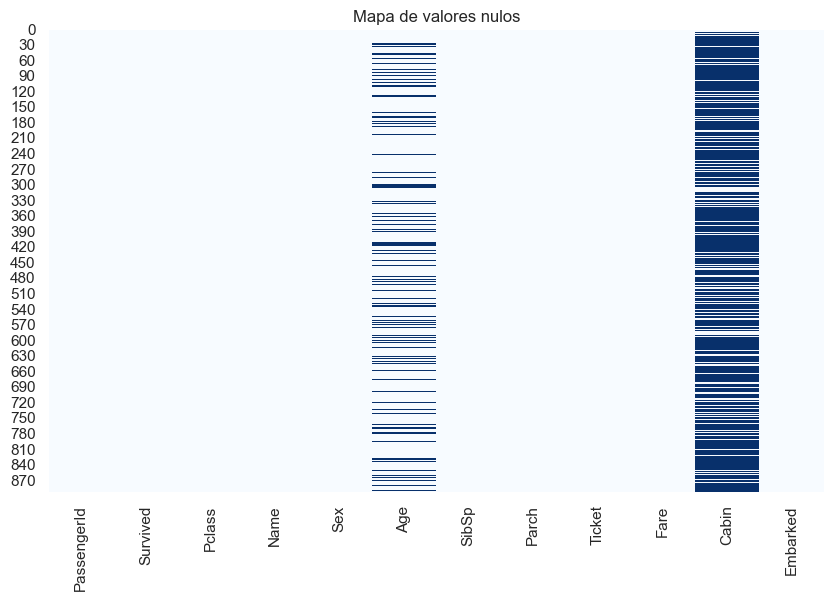

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
plt.title("Mapa de valores nulos")
plt.show()

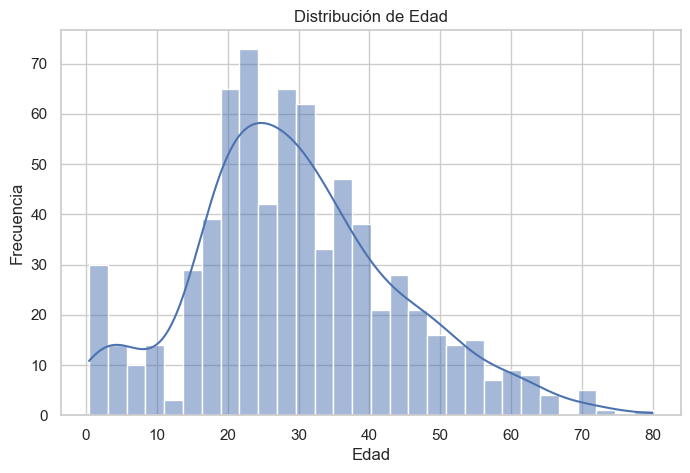

In [10]:

plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


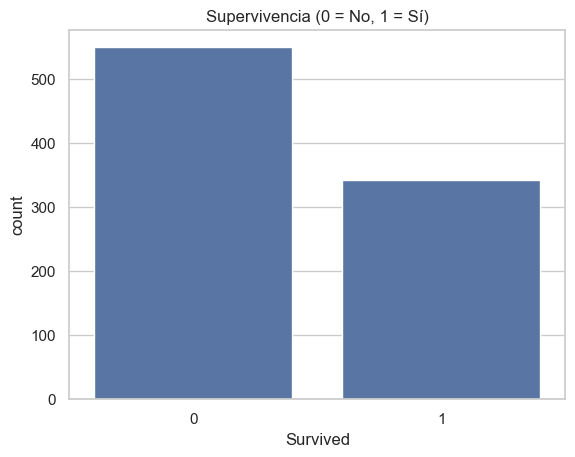

In [11]:

sns.countplot(x='Survived', data=df)
plt.title("Supervivencia (0 = No, 1 = Sí)")
plt.show()


In [12]:
df_numeric = df.select_dtypes(include='number')

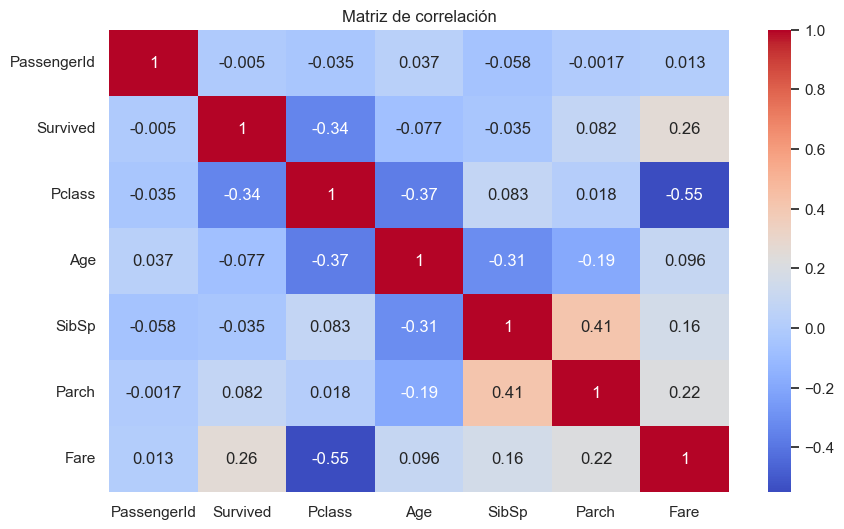

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

Data Cleaning

In [14]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_15328\2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_15328\2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [15]:
df.drop(columns=['Cabin'], inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Variable Transformations

In [17]:

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

Logistic Regretion

In [18]:
df_model = df.copy()

In [19]:
X = df_model.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df_model['Survived']

In [20]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train_filled = X_train.fillna(X_train.median(numeric_only=True))
X_test_filled = X_test.fillna(X_train.median(numeric_only=True))

X_train_filled['Sex'] = X_train_filled['Sex'].fillna(0)
X_test_filled['Sex'] = X_test_filled['Sex'].fillna(0)

X_train_encoded = pd.get_dummies(X_train_filled, columns=['Embarked'])
X_test_encoded = pd.get_dummies(X_test_filled, columns=['Embarked'])

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_encoded, y_train)
lr_preds = lr.predict(X_test_encoded)

In [24]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train_encoded, y_train)
dt_preds = dt_grid.predict(X_test_encoded)


In [26]:

from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_encoded, y_train)
rf_preds = rf_grid.predict(X_test_encoded)


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, lr_preds),
        'Precision': precision_score(y_test, lr_preds),
        'Recall': recall_score(y_test, lr_preds),
        'F1 Score': f1_score(y_test, lr_preds)
    },
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, dt_preds),
        'Precision': precision_score(y_test, dt_preds),
        'Recall': recall_score(y_test, dt_preds),
        'F1 Score': f1_score(y_test, dt_preds)
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, rf_preds),
        'Precision': precision_score(y_test, rf_preds),
        'Recall': recall_score(y_test, rf_preds),
        'F1 Score': f1_score(y_test, rf_preds)
    }
}


In [28]:
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.809701,0.794118,0.729730,0.760563
Decision Tree,0.809701,0.812500,0.702703,0.753623
Random Forest,0.805970,0.831461,0.666667,0.740000
